<a href="https://colab.research.google.com/github/Ketan-Suke/-PRODIGY_ML_05-/blob/main/Task_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

imagePaths = []
labels = []
for root,dirnames,filenames in os.walk('/content/drive/MyDrive/INTERNSHIP-prodgy/archive (4)'):
  for filename in filenames:
    if filename.lower().endswith(('png','jpeg','jpg')):
       imagePaths.append(os.path.join(root, filename))

       labels.append(root[74:])

print(len(labels))
print(len(imagePaths))

315
315


Loading pre-trained MobileNetV2 model...


<ipython-input-6-4588485516b7>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")


Model loaded successfully!
Please upload the CSV file containing food nutrition data:


Saving data.csv to data.csv
CSV file data.csv uploaded successfully!

Loading CSV file...
CSV loaded successfully!
Upload a food image:


Saving recipe-image-legacy-id-8337_11-4c346a9.jpg to recipe-image-legacy-id-8337_11-4c346a9 (1).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


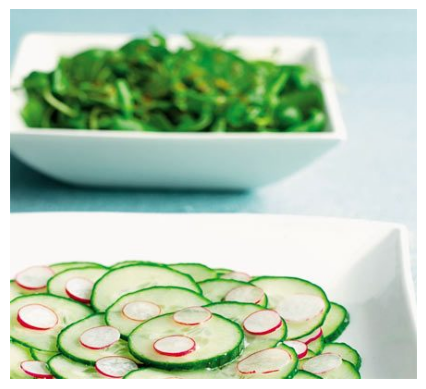

✅ **Estimated Calories:** 58.50 kcal
(No additional nutrition data available)


In [6]:
# Install required libraries
!pip install tensorflow pandas numpy pillow opencv-python

import os
import cv2
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from google.colab import files
import matplotlib.pyplot as plt

# Load a Pre-trained MobileNetV2 Model
print("Loading pre-trained MobileNetV2 model...")
base_model = MobileNetV2(weights="imagenet", include_top=False, pooling="avg")
print("Model loaded successfully!")

# Upload CSV file with nutrition info
def upload_csv():
    print("Please upload the CSV file containing food nutrition data:")
    uploaded = files.upload()
    csv_path = list(uploaded.keys())[0]
    print(f"CSV file {csv_path} uploaded successfully!\n")
    return csv_path

CSV_PATH = upload_csv()

# Load the CSV file containing nutritional information
print("Loading CSV file...")
df = pd.read_csv(CSV_PATH)
print("CSV loaded successfully!")

# Define image size
img_size = (224, 224)

def preprocess_image(image_path):
    img = load_img(image_path, target_size=img_size)
    img = img_to_array(img)
    img = preprocess_input(img)  # Use MobileNetV2 preprocessing
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    return img

def get_nutrition_info(image_name):
    row = df[df['image'] == image_name]
    if not row.empty:
        return {
            "Calories": row.iloc[0]['kcal'],
            "Carbs": row.iloc[0]['carbs'],
            "Fats": row.iloc[0]['fat'],
            "Fibre": row.iloc[0]['fibre'],
            "Protein": row.iloc[0]['protein'],
            "Salt": row.iloc[0]['salt'],
            "Saturates": row.iloc[0]['saturates'],
            "Sugars": row.iloc[0]['sugars']
        }
    return None

def upload_and_predict():
    print("Upload a food image:")
    uploaded = files.upload()

    for file_name in uploaded.keys():
        image_path = file_name  # Get the uploaded file path
        img = preprocess_image(image_path)

        # Extract features using the pre-trained model
        features = base_model.predict(img)

        # Simple calorie estimation (you can replace this with an ML model)
        predicted_calories = np.sum(features) / 10  # Just an example formula

        # Display the uploaded image
        image = load_img(image_path)
        plt.imshow(image)
        plt.axis("off")
        plt.show()

        # Get nutrition info (if available)
        nutrition_info = get_nutrition_info(image_path)
        if nutrition_info:
            result_text = (f"✅ **Estimated Calories:** {nutrition_info['Calories']:.2f} kcal\n"
                           f"🍞 **Carbs:** {nutrition_info['Carbs']} g\n"
                           f"🥑 **Fats:** {nutrition_info['Fats']} g\n"
                           f"🌿 **Fibre:** {nutrition_info['Fibre']} g\n"
                           f"💪 **Protein:** {nutrition_info['Protein']} g\n"
                           f"🧂 **Salt:** {nutrition_info['Salt']} g\n"
                           f"🥛 **Saturates:** {nutrition_info['Saturates']} g\n"
                           f"🍬 **Sugars:** {nutrition_info['Sugars']} g")
        else:
            result_text = f"✅ **Estimated Calories:** {predicted_calories:.2f} kcal\n(No additional nutrition data available)"

        print(result_text)

# Run the function to upload and predict
upload_and_predict()
